# Libraries used

Running Kernel3.9.13 base anaconda

pip install squarify
pip install yellowbrick
pip install plotly
pip install seaborn
pip install lazypredict
pip install pandas_profiling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.io as pio
import os
import matplotlib
import warnings

from imblearn.over_sampling import SMOTE


#to enable the inline plotting
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [3]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#rfc using regularization and gridsearch to find the best parameters for the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.stats import normaltest

#from pandas_profiling import ProfileReport

#from yellowbrick.classifier import ROCAUC
#from yellowbrick.classifier import ClassPredictionError
#from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette

#import lazypredict
#from lazypredict.Supervised import LazyClassifier


warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Function for EDA. Using the display() function to have  well-formatted tables. We are mainly using pandas to explore the datasets

def dataset_description(df_target):

    print('This is the Dataset shape: %s\n' % (df_target.shape, ))
    print('Dataset columns: %s\n' % df_target.columns)

    print('\nColumns description:\n')
    display(df_target.info())
    display(df_target.describe())  # describe the dataset

    print('\nNull values:\n')
    display(df_target.isnull().sum())  # Identify null values

#function performing a quick check on df_inspection to have best of pandas functions separated by a line
def quick_check(dataframe):
    print('First 5 rows %s\n')
    print(dataframe.head(2))
    print("=====================================")
    print('Dataframe shape %s\n')
    print(dataframe.shape)
    print("=====================================")
    print('Dataframe describe categorical %s\n')
    print(dataframe.describe(include=['O']))
    print("=====================================")
    print('Dataframe null values %s\n')
    print(dataframe.isnull().sum())
    print("=====================================")
    print('Dataframe value counts %s\n')
    print(dataframe.value_counts())
    print("=====================================")

#stats function
def stats(dataframe):
    print('Dataframe correlation %s\n')
    print(dataframe.corr())
    print("=====================================")
    print('Dataframe covariance %s\n')
    print(dataframe.cov())
    print("=====================================")
    print('Dataframe skew %s\n')
    print(dataframe.skew())
    print("=====================================")
    print('Dataframe kurtosis %s\n')
    print(dataframe.kurt())
    print("=====================================")

#create a function to normalize characters from a dataset's column in Spanish
def normalize_characters(df, column):
    df[column] = df[column].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace('á', 'a')
    df[column] = df[column].str.replace('é', 'e')
    df[column] = df[column].str.replace('í', 'i')
    df[column] = df[column].str.replace('ó', 'o')
    df[column] = df[column].str.replace('ú', 'u')
    df[column] = df[column].str.replace('ñ', 'n')
    df[column] = df[column].str.replace('ü', 'u')
    df[column] = df[column].str.replace('ç', 'c')
    df[column] = df[column].str.replace('(', '')
    df[column] = df[column].str.replace(')', '')
    df[column] = df[column].str.replace('\'', '')
    df[column] = df[column].str.replace('´', '')
    df[column] = df[column].str.replace('`', '')
    df[column] = df[column].str.replace('’', '')
    return df.head(2)

#create function to change detypes in64 to int32 in a df
def change_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
    return df

def outlier_function(df, col_name):
    """ this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively"""
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                        
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                    
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
        else:
            pass
    return lower_limit, upper_limit, outlier_count

In [5]:
#show all print outputs when using a function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#display all columns
pd.set_option('display.max_columns', None)


# Importing previous dataset with outliers

In [6]:
#point to the folder where the data is stored
os.chdir(r"C:\Users\JuanHorrillo\OneDrive - IE Students\Documents\Masters\Sustainability\csvs")

# Loading combined_mod dataset
train_consolidated = pd.read_csv('train_consolidated.csv')
sample_submission = pd.read_csv('submission_without_210123.csv')

In [7]:
#put the same order for the columns in train_consolidated and sample_submission
train_consolidated = train_consolidated[sample_submission.columns]


In [8]:
#check nulls in sample_submission 
sample_submission.isnull().sum()


PipeId                                          0
Incidence                                       0
Province                                        0
Town                                            0
YearBuilt                                       0
Diameter                                        0
Length                                          0
Pressure                                        0
NumConnections                                  0
NumConnectionsUnder                             0
BoolBridle                                      0
aspect                                          0
Relative_Thickness                              0
pipe_area                                       0
Total_Connections                               0
area_connection                                 0
connection_bool                                 0
gas_natural                                     0
Material_Acrylonitrile-Butadiene-Styrene        0
Material_Copper                                 0


## Filling Nulls in sample submission file

In [9]:
#fill the nulls in No_Inspectio with 1
sample_submission['No_Inspections'].fillna(1, inplace=True)


In [10]:
#fill the nulls in average_severity_pipe  with the mean of the column
sample_submission['average_severity_pipe'].fillna(sample_submission['average_severity_pipe'].mean(), inplace=True)

In [11]:
#fill nulls in relative_risk by multyplying No_Incidences by  average_severity_pipe
sample_submission['relative_risk'] = sample_submission['No_Previous_Incidences'] * sample_submission['average_severity_pipe']

In [12]:
#fill nulls in preventive_maintenance_rate by dividing relative_risk by No_Inspections
sample_submission['preventive_maintenance_rate'] = sample_submission['relative_risk'] / sample_submission['No_Inspections']

In [13]:
#fill the nulls in Probability_rate with No_Previous_Incidences divided by No_Inspections
sample_submission['Probability_rate'] = sample_submission['No_Previous_Incidences'] / sample_submission['No_Inspections']


## Dtypes in sample submission file

In [14]:
sample_submission.dtypes

PipeId                                        int64
Incidence                                     int64
Province                                     object
Town                                         object
YearBuilt                                     int64
Diameter                                    float64
Length                                      float64
Pressure                                    float64
NumConnections                                int64
NumConnectionsUnder                           int64
BoolBridle                                    int64
aspect                                      float64
Relative_Thickness                          float64
pipe_area                                   float64
Total_Connections                             int64
area_connection                             float64
connection_bool                               int64
gas_natural                                   int64
Material_Acrylonitrile-Butadiene-Styrene      int64
Material_Cop

In [15]:
#drop Province, Town from sample_submission
sample_submission.drop(['Province', 'Town'], axis=1, inplace=True)

## Standarizing data in sample submission

In [16]:
sample_submission.head(1)

,PipeId,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,average_severity_pipe,Average_MonthsLastRev,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,InspectionYear,MonthsLastRev,relative_risk,preventive_maintenance_rate,Probability_rate,Age_pipe_at_inspection
0,446859944,0,2012,0.11,44.286,0.15,0,0,0,60.39,0.733333,15.304179,0,0.0,0,1,0,0,0,1,0,0.0121,1961.249796,0.0225,17.616667,6.6,30.8,427,0.644167,46,113.2,5.0,4.0,20.75,1.0,0.0,0.0,0.0,0.0,2021.0,24.0,0.0,0.0,0.0,9.0


In [17]:
sample_submission.columns

Index(['PipeId', 'Incidence', 'YearBuilt', 'Diameter', 'Length', 'Pressure',
       'NumConnections', 'NumConnectionsUnder', 'BoolBridle', 'aspect',
       'Relative_Thickness', 'pipe_area', 'Total_Connections',
       'area_connection', 'connection_bool', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Diameter2', 'Length2', 'Pressure2',
       'Average yearly temperature (°C)', 'Min. Temperature (°C)',
       'Max. Temperature (°C)', 'Yearly Rainfall (mm)',
       'Average year Humidity (%)', 'Rainy days per year (days)',
       'Yearly Sun Hours (hours)', 'No_Inspections', 'average_severity_pipe',
       'Average_MonthsLastRev', 'pipe_inspected_frequently',
       'No_Previous_Incidences', 'No_Previous_Severity_High',
       'No_Previous_Severity_Medium', 'No_Previous_Severity_Low',
       'InspectionYear', 'MonthsLastRev', 'relative_risk',

In [18]:
#import min max scaler
from sklearn.preprocessing import MinMaxScaler

In [19]:
#Use minmax scaler to scale these columns in sample_submission: 
# 'YearBuilt', 'Diameter','Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder', 'aspect', 'Relative_Thickness', 'pipe_area', 'Total_Connections', 'area_connection', 'Diameter2', 'Length2', 'Pressure2', 'Average yearly temperature (°C)', 'Min. Temperature (°C)', 'Max. Temperature (°C)', 'Yearly Rainfall (mm)', 'Average year Humidity (%)', 'Rainy days per year (days)', 'Yearly Sun Hours (hours)','No_Inspections', 'average_severity_pipe', 'Average_MonthsLastRev',
#       'No_Previous_Incidences', 'relative_risk', 'preventive_maintenance_rate',
#       'Probability_rate', 'No_Inspections', 'average_severity_pipe',
#       'relative_risk', 'preventive_maintenance_rate', 'Probability_rate'

scaler = MinMaxScaler()

sample_submission[['YearBuilt', 'Diameter','Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder', 'aspect', 'Relative_Thickness', 'pipe_area', 'Total_Connections', 'area_connection', 'Diameter2', 'Length2', 'Pressure2', 'Average yearly temperature (°C)', 'Min. Temperature (°C)', 'Max. Temperature (°C)', 'Yearly Rainfall (mm)', 'Average year Humidity (%)', 'Rainy days per year (days)', 'Yearly Sun Hours (hours)','No_Inspections', 'average_severity_pipe', 'Average_MonthsLastRev',
       'No_Previous_Incidences', 'relative_risk', 'preventive_maintenance_rate',
       'Probability_rate', 'No_Inspections', 'average_severity_pipe',
       'relative_risk', 'preventive_maintenance_rate', 'Probability_rate', 'InspectionYear',  'MonthsLastRev','Age_pipe_at_inspection']] = scaler.fit_transform(sample_submission[['YearBuilt', 'Diameter','Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder', 'aspect', 'Relative_Thickness', 'pipe_area', 'Total_Connections', 'area_connection', 'Diameter2', 'Length2', 'Pressure2', 'Average yearly temperature (°C)', 'Min. Temperature (°C)', 'Max. Temperature (°C)', 'Yearly Rainfall (mm)', 'Average year Humidity (%)', 'Rainy days per year (days)', 'Yearly Sun Hours (hours)','No_Inspections', 'average_severity_pipe', 'Average_MonthsLastRev',
       'No_Previous_Incidences', 'relative_risk', 'preventive_maintenance_rate',
       'Probability_rate', 'No_Inspections', 'average_severity_pipe',
       'relative_risk', 'preventive_maintenance_rate', 'Probability_rate', 'InspectionYear', 'MonthsLastRev','Age_pipe_at_inspection']])
sample_submission.head(1)

,PipeId,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,average_severity_pipe,Average_MonthsLastRev,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,InspectionYear,MonthsLastRev,relative_risk,preventive_maintenance_rate,Probability_rate,Age_pipe_at_inspection
0,446859944,0,0.925,0.166945,0.006082,0.001563,0.0,0.0,0,0.000023,0.030079,0.002762,0.0,0.0,0,1,0,0,0,1,0,0.032364,0.000037,0.000003,0.856269,0.77,0.644444,0.150805,0.382637,0.202532,0.832985,0.363636,1.0,0.209936,1.0,0.0,0.0,0.0,0.0,0.0,0.230769,0.0,0.0,0.0,0.07438


## Correlation matrix for sample_submission

In [21]:
#grpah correlation matrix in sample_submission
corr_matrix = sample_submission.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
to_drop


['pipe_area',
 'Total_Connections',
 'Diameter2',
 'Pressure2',
 'Min. Temperature (°C)',
 'Average year Humidity (%)',
 'Rainy days per year (days)',
 'Yearly Sun Hours (hours)',
 'No_Previous_Incidences',
 'No_Previous_Severity_Low',
 'MonthsLastRev',
 'relative_risk',
 'preventive_maintenance_rate',
 'Probability_rate',
 'Age_pipe_at_inspection']

<Figure size 2000x2000 with 0 Axes>

<AxesSubplot: >

Text(0.5, 1.0, 'Correlation matrix for df_baseline')

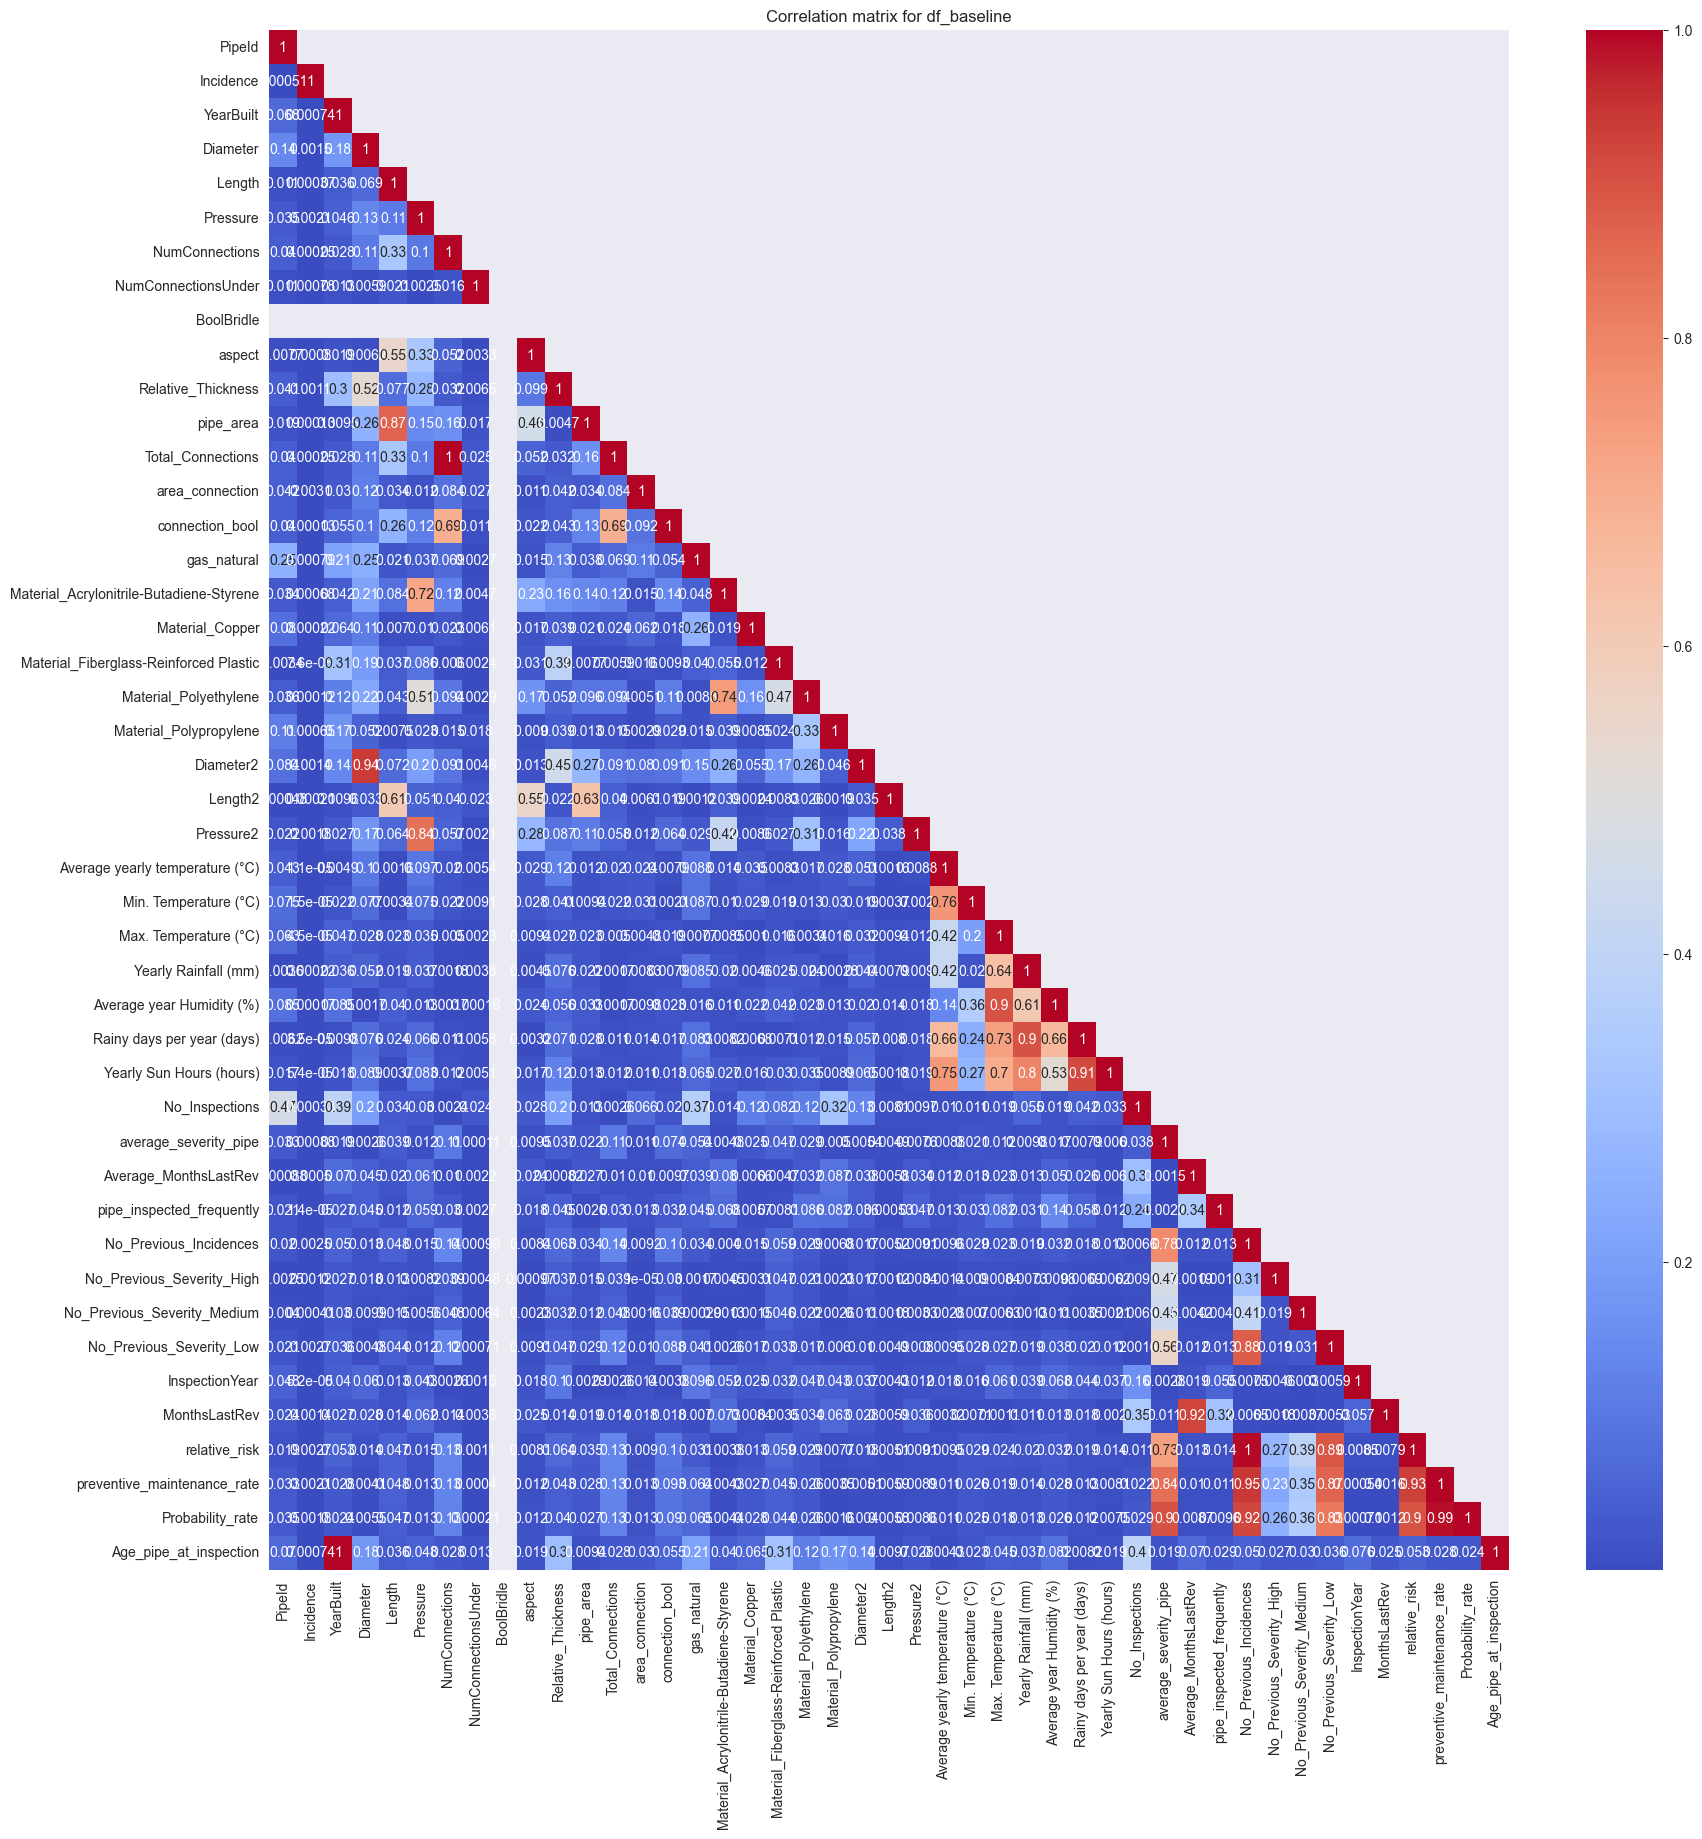

In [22]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=np.triu(corr_matrix, k=1))
plt.title('Correlation matrix for df_baseline')
plt.show()


We are not going to drop any variables as in now just for testing purposes


# Checking train file
## Nulls in train file

In [23]:
#checking nulls in train_consolidated
train_consolidated.isnull().sum()

PipeId                                      0
Incidence                                   0
Province                                    0
Town                                        0
YearBuilt                                   0
Diameter                                    0
Length                                      0
Pressure                                    0
NumConnections                              0
NumConnectionsUnder                         0
BoolBridle                                  0
aspect                                      0
Relative_Thickness                          0
pipe_area                                   0
Total_Connections                           0
area_connection                             0
connection_bool                             0
gas_natural                                 0
Material_Acrylonitrile-Butadiene-Styrene    0
Material_Copper                             0
Material_Fiberglass-Reinforced Plastic      0
Material_Polyethylene             

## Dtypes in train_consolidated

In [24]:
train_consolidated.dtypes

PipeId                                        int64
Incidence                                     int64
Province                                     object
Town                                         object
YearBuilt                                     int64
Diameter                                    float64
Length                                      float64
Pressure                                    float64
NumConnections                                int64
NumConnectionsUnder                           int64
BoolBridle                                    int64
aspect                                      float64
Relative_Thickness                          float64
pipe_area                                   float64
Total_Connections                             int64
area_connection                             float64
connection_bool                               int64
gas_natural                                   int64
Material_Acrylonitrile-Butadiene-Styrene      int64
Material_Cop

In [25]:
train_consolidated.columns

Index(['PipeId', 'Incidence', 'Province', 'Town', 'YearBuilt', 'Diameter',
       'Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder',
       'BoolBridle', 'aspect', 'Relative_Thickness', 'pipe_area',
       'Total_Connections', 'area_connection', 'connection_bool',
       'gas_natural', 'Material_Acrylonitrile-Butadiene-Styrene',
       'Material_Copper', 'Material_Fiberglass-Reinforced Plastic',
       'Material_Polyethylene', 'Material_Polypropylene', 'Diameter2',
       'Length2', 'Pressure2', 'Average yearly temperature (°C)',
       'Min. Temperature (°C)', 'Max. Temperature (°C)',
       'Yearly Rainfall (mm)', 'Average year Humidity (%)',
       'Rainy days per year (days)', 'Yearly Sun Hours (hours)',
       'No_Inspections', 'average_severity_pipe', 'Average_MonthsLastRev',
       'pipe_inspected_frequently', 'No_Previous_Incidences',
       'No_Previous_Severity_High', 'No_Previous_Severity_Medium',
       'No_Previous_Severity_Low', 'InspectionYear', 'MonthsLastRe

In [26]:
#drop 'MaintenanceId', InspectionDate, Province, Province, 'Severity_high', 'Severity_medium', 'Severity_low'
train_consolidated.drop(['Province', 'Town'], axis=1, inplace=True)

In [27]:
#difference in columns between train_consolidated and sample_submission
set(train_consolidated.columns) - set(sample_submission.columns)


set()

## Standarizing

In [28]:
scaler = MinMaxScaler()

train_consolidated[['YearBuilt', 'Diameter','Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder', 'aspect', 'Relative_Thickness', 'pipe_area', 'Total_Connections', 'area_connection', 'Diameter2', 'Length2', 'Pressure2', 'Average yearly temperature (°C)', 'Min. Temperature (°C)', 'Max. Temperature (°C)', 'Yearly Rainfall (mm)', 'Average year Humidity (%)', 'Rainy days per year (days)', 'Yearly Sun Hours (hours)','No_Inspections', 'average_severity_pipe', 'Average_MonthsLastRev',
       'No_Previous_Incidences', 'relative_risk', 'preventive_maintenance_rate',
       'Probability_rate', 'No_Inspections', 'average_severity_pipe',
       'relative_risk', 'preventive_maintenance_rate', 'Probability_rate', 'InspectionYear',  'MonthsLastRev','Age_pipe_at_inspection']] = scaler.fit_transform(train_consolidated[['YearBuilt', 'Diameter','Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder', 'aspect', 'Relative_Thickness', 'pipe_area', 'Total_Connections', 'area_connection', 'Diameter2', 'Length2', 'Pressure2', 'Average yearly temperature (°C)', 'Min. Temperature (°C)', 'Max. Temperature (°C)', 'Yearly Rainfall (mm)', 'Average year Humidity (%)', 'Rainy days per year (days)', 'Yearly Sun Hours (hours)','No_Inspections', 'average_severity_pipe', 'Average_MonthsLastRev',
       'No_Previous_Incidences', 'relative_risk', 'preventive_maintenance_rate',
       'Probability_rate', 'No_Inspections', 'average_severity_pipe',
       'relative_risk', 'preventive_maintenance_rate', 'Probability_rate', 'InspectionYear', 'MonthsLastRev','Age_pipe_at_inspection']])
train_consolidated.head(1)

,PipeId,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,average_severity_pipe,Average_MonthsLastRev,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,InspectionYear,MonthsLastRev,relative_risk,preventive_maintenance_rate,Probability_rate,Age_pipe_at_inspection
0,489616,0,0.818182,0.088481,0.000298,0.004689,0.0,0.0,0,0.000009,0.006451,0.000093,0.0,0.0,0,1,0,0,0,1,0,0.010435,8.912208e-08,0.000025,0.590214,0.26,0.859259,0.158858,0.003215,0.278481,0.713987,0.0,1.0,0.276129,1,0.0,0,0,0,0.3,0.410256,0.0,0.0,0.0,0.022727


In [29]:
#creating a subset for altering the dataset after initial EDA
df_baseline = train_consolidated.copy()


In [30]:
df_baseline.head(1)

,PipeId,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,average_severity_pipe,Average_MonthsLastRev,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,InspectionYear,MonthsLastRev,relative_risk,preventive_maintenance_rate,Probability_rate,Age_pipe_at_inspection
0,489616,0,0.818182,0.088481,0.000298,0.004689,0.0,0.0,0,0.000009,0.006451,0.000093,0.0,0.0,0,1,0,0,0,1,0,0.010435,8.912208e-08,0.000025,0.590214,0.26,0.859259,0.158858,0.003215,0.278481,0.713987,0.0,1.0,0.276129,1,0.0,0,0,0,0.3,0.410256,0.0,0.0,0.0,0.022727


In [31]:
#count values for Incidence
df_baseline['Incidence'].value_counts()


0    6044998
1      10835
Name: Incidence, dtype: int64

# Running model with all df

In [32]:
#rename df_baseline as x
X = df_baseline.drop('Incidence', axis=1)
y = df_baseline['Incidence']
X_test = sample_submission.drop('Incidence', axis=1)
y_test = sample_submission['Incidence'] 

# Approach 1: Stratifying with undersampling 


In [ ]:
#undersampling the dataset
df_baseline_undersampling = df_baseline.groupby('Incidence').apply(lambda x: x.sample(df_baseline['Incidence'].value_counts().min(), random_state=42)).reset_index(drop=True)

df_baseline_undersampling['Incidence'].value_counts()


# Approach 2 : SMOTE to tackle the unbalanced dataset problem

#using SMOTE to balance the dataset creating a subset dataset with target y = 'Incidence' and removing Incidence','MonthsLastRev','InspectionDay','PipeId', 'MaintenanceId', 'InspectionYear', 'InspectionDate',  'Province', 'Town', 'YearBuilt' for x
X = df_baseline.drop(['PipeId','Province', 'Town'], axis=1)
y = df_baseline['Incidence']
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_res.shape,y_res.shape

#create a pandas dataframe with the new balanced dataset
df_baseline_balanced = pd.DataFrame(X_res, columns=X.columns)
df_baseline_balanced['Incidence'] = y_res
df_baseline_balanced.head()


In [ ]:
#using SMOTE to balance the dataset creating a subset dataset with target y = 'Incidence'
X = df_baseline.drop('Incidence', axis=1)
y = df_baseline['Incidence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

#count values for Incidence in y_train
y_train.value_counts()



# Baseline approach


## Random Forest Classifier

# Trying model 

In [33]:
#random forest classifier with regularization and gridsearch to find the best parameters for the model
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth = 3, verbose=2, n_estimators=100, max_features='auto', min_samples_leaf=1, min_samples_split=2, class_weight='balanced' )
rfc.fit(X, y)
y_pred = rfc.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.8s


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished


RandomForestClassifier(class_weight='balanced', max_depth=3,
                       max_features='auto', n_jobs=-1, random_state=42,
                       verbose=2)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.9s finished


In [34]:
predictions = rfc.predict_proba(X_test)
predictions = predictions[:, 1]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    4.1s finished


In [35]:
print(accuracy_score(y_test, y_pred)) 

0.9462864378889191


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    907964
           1       0.00      0.06      0.00      1769

    accuracy                           0.95    909733
   macro avg       0.50      0.50      0.49    909733
weighted avg       1.00      0.95      0.97    909733



In [38]:
#use model to predict on test set
predictions = rfc.predict_proba(X_test)
predictions = predictions[:, 1]

#show accuracy score
print(accuracy_score(y_test, y_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s


0.9115070026040607


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.1s finished


In [37]:
#drop incidence in sample_submission
sample_submission = sample_submission.drop('Incidence', axis=1)

In [38]:
#make predictions for submission using the model
predictions = rfc.predict_proba(sample_submission)
predictions = predictions[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.5s finished


In [39]:
#add predictions to submission
sample_submission ['Incidence'] = predictions

#show submission
sample_submission.head(1)

,PipeId,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,average_severity_pipe,Average_MonthsLastRev,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,InspectionYear,MonthsLastRev,relative_risk,preventive_maintenance_rate,Probability_rate,Age_pipe_at_inspection,Incidence
0,446859944,0.925,0.166945,0.006082,0.001563,0.0,0.0,0,0.000023,0.030079,0.002762,0.0,0.0,0,1,0,0,0,1,0,0.032364,0.000037,0.000003,0.856269,0.77,0.644444,0.150805,0.382637,0.202532,0.832985,0.363636,1.0,0.209936,1.0,0.0,0.0,0.0,0.0,0.0,0.230769,0.0,0.0,0.0,0.07438,0.233799


In [40]:
#drop all columns except PipeId and Incidence in submission2 creating kaggle_submission
kaggle_submission = sample_submission.drop(['YearBuilt', 'Diameter', 'Length', 'Pressure',
       'NumConnections', 'NumConnectionsUnder', 'BoolBridle', 'aspect',
       'Relative_Thickness', 'pipe_area', 'Total_Connections',
       'area_connection', 'connection_bool', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Diameter2', 'Length2', 'Pressure2',
       'Average yearly temperature (°C)', 'Min. Temperature (°C)',
       'Max. Temperature (°C)', 'Yearly Rainfall (mm)',
       'Average year Humidity (%)', 'Rainy days per year (days)',
       'Yearly Sun Hours (hours)', 'No_Inspections', 'average_severity_pipe',
       'Average_MonthsLastRev', 'pipe_inspected_frequently',
       'No_Previous_Incidences', 'No_Previous_Severity_High',
       'No_Previous_Severity_Medium', 'No_Previous_Severity_Low',
       'InspectionYear', 'MonthsLastRev', 'relative_risk',
       'preventive_maintenance_rate', 'Probability_rate',
       'Age_pipe_at_inspection'], axis=1)


In [41]:
#show kaggle_submission
kaggle_submission.head(10)

,PipeId,Incidence
0,446859944,0.233799
1,428124500,0.444175
2,438428871,0.228996
3,429034569,0.449742
4,411184477,0.218327
5,428837983,0.233799
6,428837841,0.233799
7,428838331,0.449742
8,1200432,0.486596
9,1200564,0.260187


In [42]:
kaggle_submission.shape

(909733, 2)

In [44]:
#export kaggle_submission to csv
os.chdir(r"C:\Users\JuanHorrillo\OneDrive - IE Students\Documents\Masters\Sustainability\csvs")

kaggle_submission.to_csv('kaggle_submission_rf3_without_outliers_correlated.csv', index=False)

In [ ]:
#random forest classifier with regularization and gridsearch to find the best parameters for the model
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth = 2, verbose=1, n_estimators=100, max_features='auto', min_samples_leaf=1, min_samples_split=2, class_weight='balanced' )
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
predictions = rfc.predict_proba(X_test)
predictions = predictions[:, 1]

#show accuracy score
print(accuracy_score(y_test, y_pred))


In [ ]:
#show classification report
print(classification_report(y_test, y_pred))

In [ ]:
#use model to predict on test set
predictions = rfc.predict_proba(X_test)
predictions = predictions[:, 1]

#show accuracy score
print(accuracy_score(y_test, y_pred))

In [ ]:
#count null in sample_submission
sample_submission.isnull().sum()

In [ ]:
sample_submission.head(10)

In [ ]:
sample_submission.shape

In [ ]:
#drop incidence in sample_submission
sample_submission = sample_submission.drop('Incidence', axis=1)

In [ ]:
#make predictions for submission using the model
predictions = rfc.predict_proba(sample_submission)
predictions = predictions[:, 1]

In [ ]:
#add predictions to submission
sample_submission ['Incidence'] = predictions

#show submission
sample_submission.head(1)


In [ ]:
sample_submission.columns

In [ ]:
#drop all columns except PipeId and Incidence in submission2 creating kaggle_submission
kaggle_submission = sample_submission.drop(['Diameter', 'Length', 'Pressure', 'NumConnections', 'aspect',
       'Relative_Thickness', 'area_connection', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Yearly Sun Hours (hours)',
       'Average_MonthsLastRev', 'MonthsLastRev', 'No_Inspections',
       'No_Incidences_Total', 'Age_pipe_at_inspection',
       'Population density (persons/sqkm)'], axis=1)


In [ ]:

#show kaggle_submission
kaggle_submission.head(10)


In [ ]:
kaggle_submission.shape

In [ ]:
#export kaggle_submission to csv
os.chdir(r"C:\Users\pedro\datathon")

kaggle_submission.to_csv('kaggle_submission_new_features_baseline.csv', index=False)


# Lazypredict

In [ ]:
#using lazypredict to  find the best model to predict on the dataset
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=1, ignore_warnings=False, custom_metric=None, predictions=True, random_state=42, n_jobs=-1)
models, predictions = clf.fit(X_train, X_train, X_test, y_test)
models
